# Understanding Neural Network Hyperparameters

Greetings! In this notebook we will create a variety of neural networks to classify MNIST handwritten digits. In doing so, we will explore and visualize the impact of adjusting important hyperparameters, including:

* Batch Size
* Learning Rate
* Activation Functions

We will also experiment with adding more layers to the network.

This exploration is perfect for beginners who want to learn how to create neural networks using Keras.

Let's get started!

Link: https://www.kaggle.com/code/youn6429/beginner-s-guide-to-nn-hyperparameters/edit

### Load the Good Stuff

In [1]:
import keras
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from google.colab import files
import io

SEED = 42

### Load the Data

In the MNIST dataset, each sample is a 28 x 28 px image that has been flattened into a 1D array of length 784.

* Train: 42,000 samples
* Test: 28,000 samples

In [2]:
train = pd.read_csv("https://ecoles-projets-shared-files.hupi.io/train.csv")
test = pd.read_csv("https://ecoles-projets-shared-files.hupi.io/test.csv")
y = train.pop("label")

In [3]:
train.shape, test.shape

((42000, 784), (28000, 784))

In [ ]:
train.head()

Split the training data into training and validation sets : 80% / 20%

In [ ]:
X_train, X_valid, y_train, y_valid =             # To complete
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

As we know, the `X` dataframes contain images of handwritten digits represented by vectors of pixel values.

We can preview `X_train`, but it isn't easy to see what's going on.

In [ ]:
X_train.head()

Instead, we can convert each row of the data frame into a 28x28 image. Much easier to visualize!

In [ ]:
for i in range(12):
    plt.subplot(3, 4, i+1)
    image = X_train.iloc[i].values.reshape((28, 28))
    plt.imshow(image, cmap="Greys")
    plt.axis("off")
plt.tight_layout()
plt.show()

The `y` arrays contain the actual labels (1-10) for the samples. These are the values we are trying to predict.

In [ ]:
list(y_train[0:12])

### Preprocessing

Normalizing the inputs aids the training process (increasing the speed and helping the neural network avoid local minima).

Here, pixel values are scaled by their max value (255), so that they range from 0 to 1.

In [ ]:
X_train =              # To complete
X_valid =              # To complete

We also need to address the target (aka label), which currently is a singled column vector containing the value (1-10) of each corresponding input image.

Here, we use Keras' built-in `to_categorical` method to convert the target into a one-hot encoded vector of length 10.

In [ ]:
n = 10
y_train =             # To complete
y_valid =             # To complete

In [ ]:
y_train.shape, y_valid.shape

### Modeling

Keras offers two methods for creating models: Sequential and Functional. 

Here, we use the Sequential method to design a shallow neural network with:

* One dense hidden layer with 64 sigmoid neurons and input size (784,1)
* One dense output layer with 10 softmax neurons

In [ ]:
model = Sequential()
model.add(Dense()            # To complete
model.add()                  # To complete

In [ ]:
model.summary()

The number of parameters in the hidden layer depends on the number of neurons in the hidden layer and in the shape of the input layer: $n_{param} = n_{weights} + n_{biases}$.

Do the number of parameters in the model summary make sense?

In [ ]:
784 * 64 + 64 # 1 parameter for each of the 784 input neurons * 64 hidden neurons + 64 additional bias terms

In [ ]:
64 * 10 + 10 # 1 parameter for each of the 64 hidden layer neurons * 10 output neurons + 10 additional bias terms

In [ ]:
(784 * 64 + 64) + (64 * 10 + 10) # total number of parameters

Next, compile the model. Indicate the desired loss (cost) function and optimizer as well as an other additional metrics that should be calcualted during training. Usse the mean squared error for the loss, a learning rate of 0,01 and a metric accuracy.

In [ ]:
model.compile()            # To complete

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Finally, fit the model to the training data. Passing in validation data enables the model to estimate performance on new observations. Choose a batch_size of 128. train on 50 epochs.

In [ ]:
hist = model.fit()            # To complete

### Evaluation

How did the model do? The learning curves illustrate how loss and accuracy changed over the course of training.

In [ ]:
val_loss =             # To complete
val_accuracy =             # To complete

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=range(0,len(val_accuracy)), y=val_accuracy, ax=ax[0], label="Validation Accuracy")
sns.lineplot(x=range(0,len(val_loss)), y=val_loss, ax=ax[1], label="Validation Loss")

ax[0].set_xlabel("# of Epochs")
ax[1].set_xlabel("# of Epochs")

plt.suptitle("Learning Curves")
plt.show()

To wrap things up, we can evaluate the model on the validation data to estimate test performance.

In [ ]:
model.evaluate(X_valid, y_valid)

### An Aside: Saving Models

As an aside, Keras makes it easy to save and load models to/from files, thus saving you from having to re-train!

Uncomment below to utilize this functionality.

In [ ]:
model.save("model.hd5")
model = keras.models.load_model("model.hd5")
model.summary()

## Experimentation

Despite a lot going on under the hood, Keras makes it simple to create and apply a neural network.

Now, let's experiment with alternative model configurations, including:

* Different batch sizes
* Increased or decreased learning rates
* Additional hidden layers
* Alternative neuronal activation functions

### Helper Functions

To reduce code duplication, the following wrapper class bundles Keras and plotting functionality together. Very handy :)

In [ ]:
class NeuralNetwork():
    def __init__(self, name, batch_size, epochs, learning_rate, verbose):
        self.name = name
        self.batch_size = batch_size
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.verbose = verbose
        self.model = Sequential()
        
    def add_(self, layer):
        self.model.add(layer)

    def compile_and_fit(self):
        self.model.compile(loss="mean_squared_error", optimizer=SGD(lr=self.learning_rate), metrics=["accuracy"])
        self.history = self.model.fit(x=X_train,
                                      y=y_train,
                                      batch_size=self.batch_size,
                                      epochs=self.epochs,
                                      verbose=self.verbose,
                                      validation_data=(X_valid, y_valid))
        self.val_loss = self.history.history["val_loss"]
        self.val_accuracy = self.history.history["val_accuracy"]
    
    def plot_learning_curves(self):
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))
        
        sns.lineplot(x=range(0,len(self.val_accuracy)), y=self.val_accuracy, ax=ax[0], label="Validation Accuracy")
        sns.lineplot(x=range(0,len(self.val_loss)), y=self.val_loss, ax=ax[1], label="Validation Loss")

        ax[0].set_xlabel("# of Epochs")
        ax[1].set_xlabel("# of Epochs")

        plt.suptitle("Learning Curves: {}".format(self.name))
        plt.show()

    def evaluate_(self):
        return self.model.evaluate(X_valid, y_valid)
    
    def save(self, filename):
        self.model.save("working/"+filename+".hd5")
        
    def summary_(self):
        return self.model.summary()

In [ ]:
def compare_learning_curves(models):
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    
    for model in models:
        sns.lineplot(x=range(0,len(model.val_accuracy)), y=model.val_accuracy, ax=ax[0], label=model.name)
        sns.lineplot(x=range(0,len(model.val_loss)), y=model.val_loss, ax=ax[1], label=model.name)
    
    ax[0].set_xlabel("# of Epochs")
    ax[1].set_xlabel("# of Epochs")

    ax[0].set_title("Validation Accuracy")
    ax[1].set_title("Validation Loss")

    plt.suptitle("Learning Curves")
    plt.show()

### Batch Size

Batch Size is a critical hyperparameter that controls how many training samples are passed through the model at a time. These inputs are processed via forward propagation to produce an output, which is then evaluated by the cost function. Finally, the weights and biases of all neurons are updated via gradient descent to generate better and better estimates.

Changing the batch size changes the number of training samples that are used to calculate the cost function. Too big a batch size can be computationally expensive and tends to create models that do not generalize as well. Too small a batch size can lead to lengthy training processes and wasteful use of resources.

Here we compare learning curves for a handful of models utilizing different batch sizes.

In [ ]:
batch_sizes = [8, 16, 32, 64, 128, 256]
n_epochs = 50

In [ ]:
accuracy = pd.DataFrame(columns=batch_sizes, index=range(n_epochs))
loss = pd.DataFrame(columns=batch_sizes, index=range(n_epochs))
accuracy["Epoch"] = range(n_epochs)
loss["Epoch"] = range(n_epochs)

Calculate the accuracy and the loss for each batch size

In [ ]:
for batch_size in batch_sizes:
    model = Sequential()
    model.add()            # To complete
    model.add()            # To complete
    model.compile()            # To complete
    
    hist = model.fit()            # To complete
    
    accuracy[batch_size] =             # To complete
    loss[batch_size] =             # To complete

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `lea

In [ ]:
accuracy_melt = accuracy.melt(value_name="Accuracy", var_name="Batch Size", id_vars=["Epoch"])
loss_melt = loss.melt(value_name="Loss", var_name="Batch Size", id_vars=["Epoch"])

accuracy_melt["Batch Size"] = accuracy_melt["Batch Size"].astype(object)
loss_melt["Batch Size"] = loss_melt["Batch Size"].astype(object)

In [ ]:
accuracy_melt = accuracy.melt(value_name="Accuracy", var_name="Batch Size", id_vars=["Epoch"])
loss_melt = loss.melt(value_name="Loss", var_name="Batch Size", id_vars=["Epoch"])

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.lineplot(x="Epoch", y="Accuracy", hue="Batch Size", data=accuracy_melt, ax=ax[0], legend="full")
sns.lineplot(x="Epoch", y="Loss", hue="Batch Size", data=loss_melt, ax=ax[1], legend="full")

ax[0].set_title("Validation Accuracy")
ax[1].set_title("Validation Loss")

ax[0].set_xlabel("# of Epochs")
ax[1].set_xlabel("# of Epochs")

plt.suptitle("Learning Curves")
plt.show()

#### What observation can you make on the impact of the batch size ?




### Learning Rate

The learning rate, $\eta$, controls the step size of gradient descent. In other words, it controls the magnitude of the adjustments made to model weights and biases

Large learning rates require fewer training epochs, but can cause unstable training and failure to converge to the optimal solution. On the other hand, small learning rates are more stable, but require more training epochs and are computationally inefficient.

Let's tweak the learning rate and observe the impact.

In [ ]:
n_epochs = 100
batch_size = 128
verbose = 0

In [ ]:
learning_rate = 100
nn_lr_100 =             # To complete
nn_lr_100.add_()            # To complete
nn_lr_100.add_()            # To complete

learning_rate = 1000
nn_lr_1000 =             # To complete
nn_lr_1000.add_()            # To complete
nn_lr_1000.add_()            # To complete

learning_rate = 10
nn_lr_10 =             # To complete
nn_lr_10.add_()            # To complete
nn_lr_10.add_()            # To complete

learning_rate = 1
nn_lr_1 =             # To complete
nn_lr_1.add_()            # To complete
nn_lr_1.add_()            # To complete

learning_rate = 0.1
nn_lr_p1 =             # To complete
nn_lr_p1.add_()            # To complete
nn_lr_p1.add_()            # To complete

learning_rate = 0.01 # default
nn_lr_p01 =             # To complete
nn_lr_p01.add_()            # To complete
nn_lr_p01.add_()            # To complete

learning_rate = 0.001
nn_lr_p01 =             # To complete
nn_lr_p01.add_()            # To complete
nn_lr_p01.add_()            # To complete

nn_lr_100.compile_and_fit()
nn_lr_1000.compile_and_fit()
nn_lr_10.compile_and_fit()
nn_lr_1.compile_and_fit()
nn_lr_p1.compile_and_fit()
nn_lr_p01.compile_and_fit()
nn_lr_p001.compile_and_fit()

In [ ]:
learning_rate = 0.1
nn_lr_p1 = NeuralNetwork("LR = {}".format(learning_rate), batch_size, n_epochs, learning_rate, verbose)
nn_lr_p1.add_(Dense(64, activation="sigmoid", input_shape=(784,)))
nn_lr_p1.add_(Dense(10, activation="softmax"))
nn_lr_p1.compile_and_fit()

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


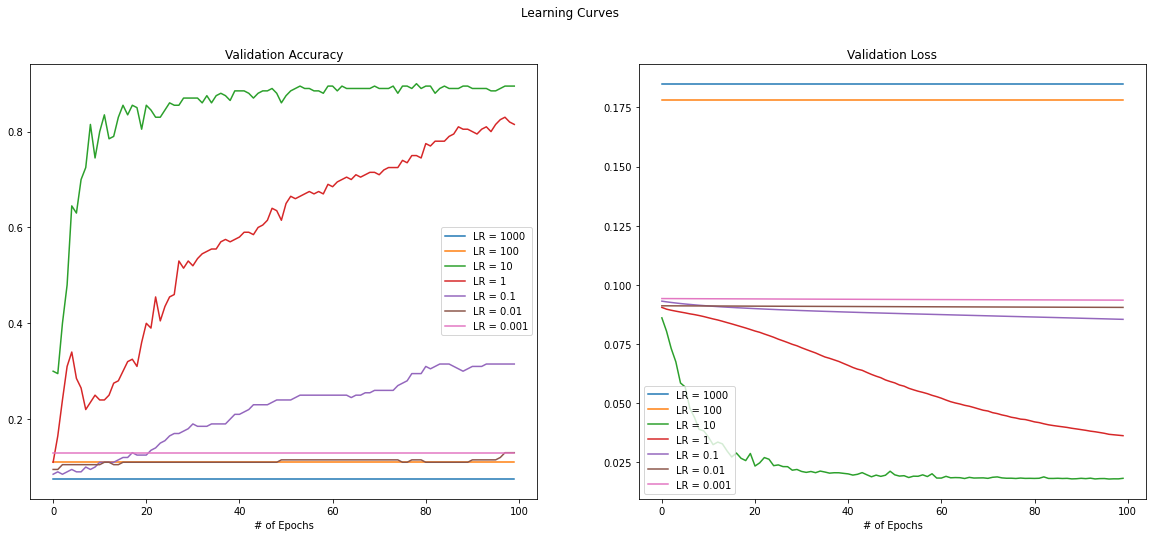

In [ ]:
compare_learning_curves([nn_lr_1000, nn_lr_100, nn_lr_10, nn_lr_1, nn_lr_p1, nn_lr_p01, nn_lr_p001])

In particular, notice the training instability visible at higher LR values, for example `LR=10`:

In [ ]:
nn_lr_10.plot_learning_curves()

In contrast, there is minimal training instability at `LR<10`, however models take more epochs to reach their full potential:

In [ ]:
nn_lr_p1.plot_learning_curves()

**What observations is the impact of the learning rate ?**


### Additional Hidden Layers

In practice, neural networks rarely consist of only 3 layers. Additional hidden layers are added to enable models to extract increasingly high level representations from the data, suitable for complex applications. 

Here, we compare models with one, two and three hidden layers. Of course, you can also adjust the number of neurons in each layer, but for simplicity, we've stuck with a static 64 units.

In [ ]:
n_epochs = 100
batch_size = 128
learning_rate = 0.01
verbose = 0

In [ ]:
nn_l1 = NeuralNetwork()             # To complete
nn_l1.add_()             # To complete
nn_l1.add_()             # To complete

nn_l1.summary_()
nn_l1.compile_and_fit()
nn_l1.plot_learning_curves()

In [ ]:
nn_l2 = NeuralNetwork()             # To complete
nn_l2.add_()             # To complete
nn_l2.add_()             # To complete
nn_l2.add_()             # To complete

nn_l2.summary_()
nn_l2.compile_and_fit()
nn_l2.plot_learning_curves()

In [ ]:
nn_l3 = NeuralNetwork()             # To complete
nn_l3.add_()             # To complete
nn_l3.add_()             # To complete
nn_l3.add_()             # To complete
nn_l3.add_()             # To complete

nn_l3.summary_()
nn_l3.compile_and_fit()
nn_l3.plot_learning_curves()

In [ ]:
compare_learning_curves([nn_l1, nn_l2, nn_l3])

**What observations can you do on the impact of the number of layers?**

### Activation Functions

An activation function translates the weighted sum of a neuron's inputs and bias terms into an output that is passed further along the network. There are many different activation functions, each with varying applications. The key is for the activation function to be non-linear; this gives deep learning models the power of universal function approximators - a fancy way of saying that they can estimate any output `y` given some input `x`.

The last thing we'll look at is what happens when we substitute the `sigmoid` activation function with two popular alternatives: `tanh` and `relu`.

In [ ]:
n_epochs = 100
batch_size = 128
learning_rate = 0.01
verbose = 0

In [ ]:
nn_sigmoid = NeuralNetwork()             # To complete
nn_sigmoid.add_()             # To complete
nn_sigmoid.add_()             # To complete
nn_sigmoid.compile_and_fit()

nn_tanh = NeuralNetwork()             # To complete
nn_tanh.add_()             # To complete
nn_tanh.add_()             # To complete
nn_tanh.compile_and_fit()

nn_relu = NeuralNetwork()             # To complete
nn_relu.add_()             # To complete
nn_relu.add_()             # To complete
nn_relu.compile_and_fit()

In [ ]:
compare_learning_curves([nn_sigmoid, nn_tanh, nn_relu])

**What observations can you do depending of the activation function ?**

### Conclusion

I hope you have enjoyed learning more about neural network hyperparameters in the context of the MNIST dataset.